In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title 데이터 불러오기
# https://archive.ics.uci.edu/ml/datasets/wine
# https://www.kaggle.com/datasets/akhil0007/wine-data
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/wine.csv'
df = pd.read_csv(file_url)

## 데이터 확인

In [ ]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#@title 결측치, 칼럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
#@title 통계적 정보
pd.options.display.float_format = '{:,.4f}'.format 
df.describe()
# 1. 변수마다 값의 범위가 다름
# Nonflavanoid_Phenols : 0.13 ~ 0.66
# Proline : 278 ~ 1680
# 🤔 스케일링(scaling) : 독립변수의 범위를 동일한 수준으로 만들어주는 기법
# 2. 아웃라이어(이상치)
# color_inensity : 75% ~ max : 6.2 -> 13 (2배 이상 증가?)

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


### 목표값에서 고윳값 확인

In [ ]:
#@title 목표 변수의 고윳값 출력
df.Class.unique()

array([1, 2, 3])

In [ ]:
#@title 고윳값 가짓수 출력
df.Class.nunique()

3

In [ ]:
#@title 각 고윳값에 해당하는 개수 출력
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

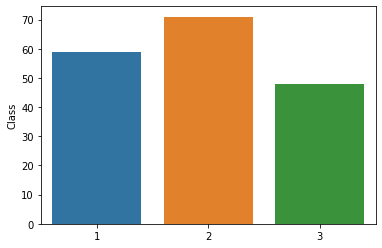

In [ ]:
#@title 고윳값 막대그래프 시각화
value_counts = df.Class.value_counts()
sns.barplot(x = value_counts.index, y = value_counts)

## 전처리 

### 스케일링
* 데이터의 스케일(Scale, 범위)을 맞추는 작업
* K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음
* 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드는 작업
* 데이터를 **동등한 수준**에서 연산하게 함

#### 스케일링 종류
|종류|설명
|-|-|
|표준화 스케일링 Standarad Scaling|평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용|
|로버스트 스케일링 Robust Scaling|데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용|
|최소-최대 스케일링 Min-Max Scaling|데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
|정규화 스케일링Normalizer Scaling|행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

  

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#### 표준화 스케일링
> 데이터를 표준정규분포 형태로 변형

$x_i-mean(x)\over sd(x)$

* $x_i$ : 변수의 i번째 값
* $mean(x)$ : 해당 변수의 평균
* $sd(x)$ : 해당 변수의 표준편차


In [ ]:
st_scaler = StandardScaler()

In [ ]:
st_scaler.fit(df)

StandardScaler()

In [ ]:
# 스케일러가 fit()을 통해 학습한 정보를 통해 데이터를 변환(스케일링)하게 하는 함수
st_scaled = st_scaler.transform(df)

In [ ]:
st_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
df_st_scaled = pd.DataFrame(st_scaled, columns = df.columns)
df_st_scaled

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.2139,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,-1.2139,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,-1.2139,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,-1.2139,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,-1.2139,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.3739,0.8763,2.9745,0.3052,0.3018,-0.3329,-0.9856,-1.4249,1.2743,-0.9302,1.1428,-1.3928,-1.2312,-0.0220
174,1.3739,0.4933,1.4126,0.4148,1.0525,0.1586,-0.7933,-1.2843,0.5491,-0.3170,0.9698,-1.1295,-1.4854,0.0099
175,1.3739,0.3328,1.7447,-0.3894,0.1517,1.4224,-1.1298,-1.3446,0.5491,-0.4221,2.2242,-1.6121,-1.4854,0.2806
176,1.3739,0.2092,0.2277,0.0127,0.1517,1.4224,-1.0337,-1.3546,1.3549,-0.2293,1.8349,-1.5683,-1.4007,0.2965


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format 
df_st_scaled.describe() # mean(평균) = 0, std(표준편차) = 1

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-1.21,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.08,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,1.37,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,1.37,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


#### 로버스트 스케일링
> 사분위값을 이용하여 계산

$x_i-Q_2(x)\over Q_3(x)-Q_1(x)$

* $x_i$ : 변수의 i번째 값
* $Q_1(x)$ : 25% 지점
* $Q_2(x)$ : 50% 지점 (변수의 중윗값)
* $Q_3(x)$ : 75% 지점

In [ ]:
rb_scaler = RobustScaler()

In [ ]:
# fit + transform (한번에)
rb_scalded = rb_scaler.fit_transform(df)
df_rb_scaled = pd.DataFrame(rb_scalded, columns = df.columns)

In [ ]:
df_rb_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.03,-0.04,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15
std,0.39,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65
min,-0.50,-1.54,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82
25%,-0.50,-0.52,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
75%,0.50,0.48,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64
max,0.50,1.35,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08


#### 최소-최대 스케일링
> 최솟값, 최댓값을 사용하여 스케일링, 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨

$x_i-min(x)\over max(x)-min(x)$

* $x_i$ : 변수의 i번째 값
* $min(x)$ : 최솟값
* $max(x)$ : 최댓값

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df)
df_mm_scaled = pd.DataFrame(mm_scaled, columns = df.columns)
df_mm_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.47,0.52,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33
std,0.39,0.21,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.35,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16
50%,0.50,0.53,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28
75%,1.00,0.70,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### 스케일링 방식 선택 기준
* 아웃라이어의 유무 : 아웃라이어 영향이 클 시 로버스트 스케일링이 적합 (4분위값 이용)
* 데이터의 기존 분포를 최대한 유지해야할 시 : 최소-최대 스케일링
* 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : 표준화 스케일링

#### 스케일링별 특징
|구분|결과물의 특징|
|-|-|
|표준화 스케일링|아웃라이어의 영향을 받음.<br>평균 0, 분산 1이 되게끔 분포시키기 때문에, **데이터의 기존 분포 형태가 사라지고** 정규분포를 따르는 결과물을 가져 옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때,<br> **아웃라이어의 영향을 받지 않음**.<br>변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|아웃라이어의 영향을 받음.<br>위의 두 스케일러와 비교했을 때, **데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화**시킴.<br>데이터의 범위는 0~1로 나타남|

#### 스케일링 적용 시 주의점
* 스케일링 대상에서 종속변수를 제외
* 스케일링 전 훈련셋과 시험셋을 구분

In [ ]:
# 훈련셋과 시험셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1),
    df.Class, test_size=0.2, random_state=100
)

In [ ]:
# 데이터 특성 보존을 위해 최대-최소 스케일러 사용
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train) # fit을 통해 학습된 정보가 scaler 객체에 저장됨
X_test_scaled = mm_scaler.transform(X_test)

## 모델링 및 예측/평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

In [ ]:
pred

array([2, 3, 1, 2, 3, 3, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

### 하이퍼파라미터 튜닝
`KNeighborsClassifier` : 분류 문제 알고리즘<br>
cf. `KNeighborsRegressor` : 회귀 문제 알고리즘
주요 패러미터
- n_neighbors=5 : 예측에 참고할 이웃 수
- weights='uniform' : 예측에 사용되는 가중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치가 부여.
('uniform', 'distance', 사용자 정의 함수)
- metric='minkowski' : 거리 측정 기준 (DistanceMetric)
- n_jobs=None : 실행할 병렬 작업 수

> 별도로 지정해주지 않으면 기본값으로 반영<br>
> 알고리즘에 쓰이는 매개변수를 조정 = **하이퍼파라미터 튜닝**

In [ ]:
def tuning(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [ ]:
tuning(7)

0.9444444444444444


In [ ]:
tuning(3)

0.9166666666666666


In [ ]:
scores = [(i, tuning(i)) for i in range(1, 21)]
scores

[(1, 0.9166666666666666),
 (2, 0.8611111111111112),
 (3, 0.9166666666666666),
 (4, 0.9166666666666666),
 (5, 0.8888888888888888),
 (6, 0.9166666666666666),
 (7, 0.9444444444444444),
 (8, 0.9166666666666666),
 (9, 0.8888888888888888),
 (10, 0.8888888888888888),
 (11, 0.9444444444444444),
 (12, 0.9444444444444444),
 (13, 0.9722222222222222),
 (14, 0.9444444444444444),
 (15, 0.9444444444444444),
 (16, 0.9444444444444444),
 (17, 0.9166666666666666),
 (18, 0.9722222222222222),
 (19, 0.9444444444444444),
 (20, 0.9722222222222222)]

In [ ]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(13, 0.9722222222222222),
 (18, 0.9722222222222222),
 (20, 0.9722222222222222),
 (7, 0.9444444444444444),
 (11, 0.9444444444444444),
 (12, 0.9444444444444444),
 (14, 0.9444444444444444),
 (15, 0.9444444444444444),
 (16, 0.9444444444444444),
 (19, 0.9444444444444444),
 (1, 0.9166666666666666),
 (3, 0.9166666666666666),
 (4, 0.9166666666666666),
 (6, 0.9166666666666666),
 (8, 0.9166666666666666),
 (17, 0.9166666666666666),
 (5, 0.8888888888888888),
 (9, 0.8888888888888888),
 (10, 0.8888888888888888),
 (2, 0.8611111111111112)]

## 알고리즘 이해
* KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류
* 변수의 스케일 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음
* 거리가 동점일 경우
  * 사이킷런 : 랜덤으로 분류함
  * n을 홀수로 하면 동점을 근본적으로 막을 수 있음
  * 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌

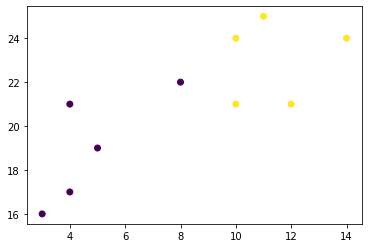

In [ ]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)

## 연습
- 타이타닉 데이터에 KNN을 통해 분류 진행
- 스케일러(표준화, 로버스트, 최소-최대)별 결과 비교